In [5]:
import pandas as pd
df = pd.read_csv("data.csv")

In [7]:
df.head(10)

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...
5,The tragedy of air pollution — and an urgent d...,Rosamund Adoo-Kissi-Debrah,October 2021,422000,12000,https://ted.com/talks/rosamund_adoo_kissi_debr...
6,The myth of Narcissus and Echo,Iseult Gillespie,February 2022,412000,12000,https://ted.com/talks/iseult_gillespie_the_myt...
7,You deserve the right to repair your stuff,Gay Gordon-Byrne,August 2021,455000,13000,https://ted.com/talks/gay_gordon_byrne_you_des...
8,What nature can teach us about sustainable bus...,Erin Meezan,February 2022,66000,1900,https://ted.com/talks/erin_meezan_what_nature_...
9,The origins of blackface and Black stereotypes,Dwan Reece,March 2019,584000,17000,https://ted.com/talks/dwan_reece_the_origins_o...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5440 non-null   object
 1   author  5439 non-null   object
 2   date    5440 non-null   object
 3   views   5440 non-null   int64 
 4   likes   5440 non-null   int64 
 5   link    5440 non-null   object
dtypes: int64(2), object(4)
memory usage: 255.1+ KB


In [9]:
# Data preparation -Deletes the record that had the missing "author" data (Data cleaning)
print(df.isnull().sum())
df.dropna(inplace=True)
print(df.isnull().sum())
print(df.info())

title     0
author    1
date      0
views     0
likes     0
link      0
dtype: int64
title     0
author    0
date      0
views     0
likes     0
link      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5439 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5439 non-null   object
 1   author  5439 non-null   object
 2   date    5439 non-null   object
 3   views   5439 non-null   int64 
 4   likes   5439 non-null   int64 
 5   link    5439 non-null   object
dtypes: int64(2), object(4)
memory usage: 297.4+ KB
None


In [10]:
# Data preparation - Separates from the "Date" column: month and year. And deletes the "Date" column
df['month'] = [value.split(" ")[0] for value in df["date"]]
df['year'] = [value.split(" ")[1] for value in df["date"]]

df = df.drop(['date'], axis=1)
df.head()

,title,author,views,likes,link,month,year
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...,December,2021
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...,February,2022
2,How play can spark new ideas for your business,Martin Reeves,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...,September,2021
3,Why is China appointing judges to combat clima...,James K. Thornton,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...,October,2021
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...,October,2021


In [11]:
# Most Viewed Ted Talks by Author
most_viewed_talks = df.sort_values("views").tail(10)
most_viewed_talks[['author','views']].head(10)

,author,views
3994,Cameron Russell,38000000
3017,Robert Waldinger,41000000
2168,Sam Berns,43000000
3251,Bill Gates,43000000
3504,Julian Treasure,49000000
4605,Brené Brown,56000000
4765,Simon Sinek,57000000
2958,Tim Urban,60000000
4084,Amy Cuddy,64000000
5436,Sir Ken Robinson,72000000


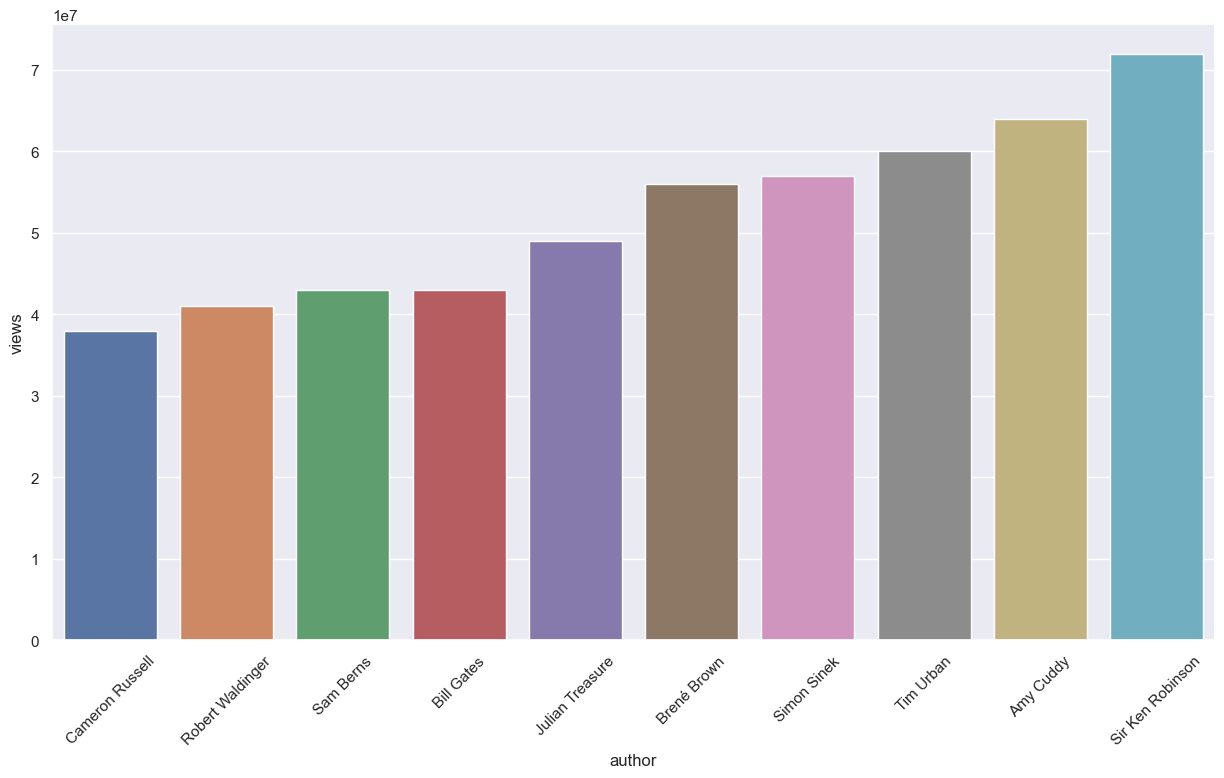

In [16]:
# Most Popular Ted talk is by Sir Ken Robinson
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
plt.figure(figsize=(15,8))
ax = sns.barplot(x="author", y="views", data=most_viewed_talks[['author','views']].head(10))
ax.tick_params(axis='x', rotation=45)

In [17]:
# Most popular Ted Talk
df.sort_values(by="views", ascending=False)[:10]

,title,author,views,likes,link,month,year
5436,Do schools kill creativity?,Sir Ken Robinson,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_scho...,February,2006
4084,Your body language may shape who you are,Amy Cuddy,64000000,1900000,https://ted.com/talks/amy_cuddy_your_body_lang...,June,2012
2958,Inside the mind of a master procrastinator,Tim Urban,60000000,1800000,https://ted.com/talks/tim_urban_inside_the_min...,February,2016
4765,How great leaders inspire action,Simon Sinek,57000000,1700000,https://ted.com/talks/simon_sinek_how_great_le...,September,2009
4605,The power of vulnerability,Brené Brown,56000000,1700000,https://ted.com/talks/brene_brown_the_power_of...,June,2010
3504,How to speak so that people want to listen,Julian Treasure,49000000,1400000,https://ted.com/talks/julian_treasure_how_to_s...,June,2013
2168,My philosophy for a happy life,Sam Berns,43000000,1300000,https://ted.com/talks/sam_berns_my_philosophy_...,October,2013
3251,The next outbreak? We're not ready,Bill Gates,43000000,1300000,https://ted.com/talks/bill_gates_the_next_outb...,March,2015
3017,What makes a good life? Lessons from the longe...,Robert Waldinger,41000000,1200000,https://ted.com/talks/robert_waldinger_what_ma...,November,2015
3994,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,38000000,1100000,https://ted.com/talks/cameron_russell_looks_ar...,October,2012


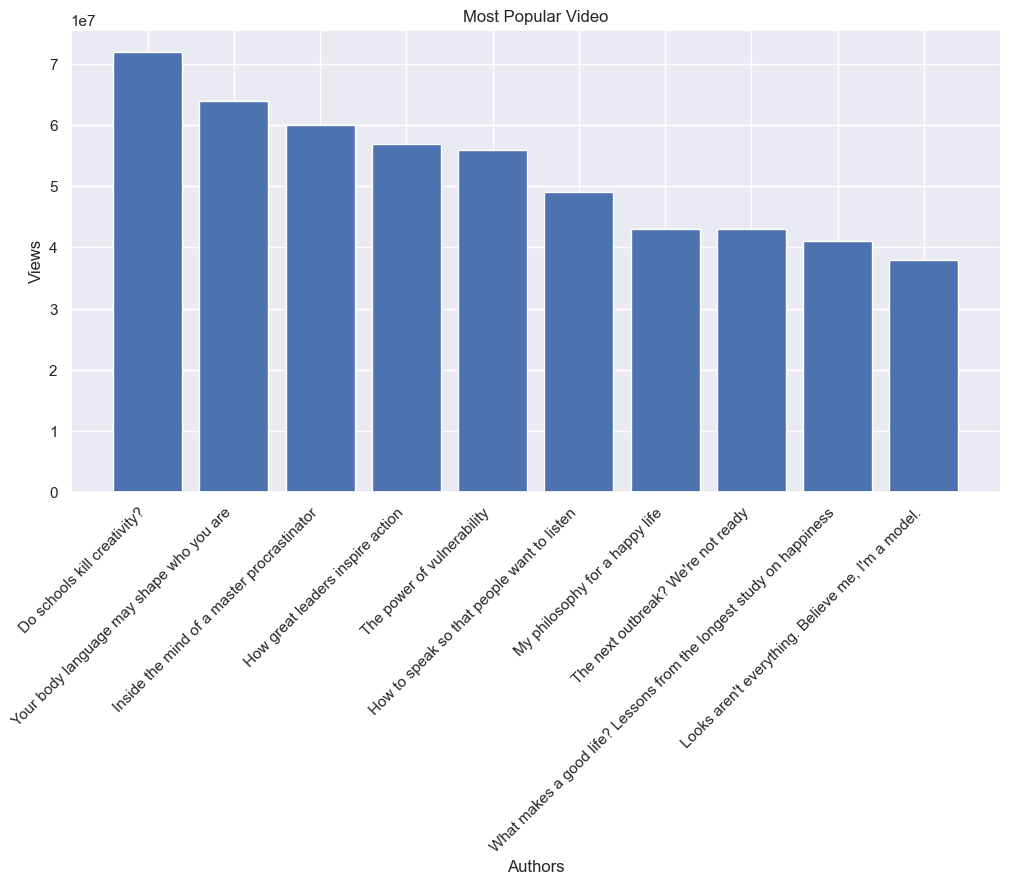

In [18]:
top_by_views = df.sort_values(by="likes", ascending=False)[:10]
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(top_by_views['title'],top_by_views['views'])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
plt.xlabel('Authors')
plt.ylabel('Views')
plt.title('Most Popular Video')
plt.show()